In [1]:
# Installs RDKit
!pip install rdkit==2022.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from rdkit import Chem
from rdkit.Chem.BRICS import BRICSDecompose
from rdkit.Chem.Draw import MolsToGridImage

In [35]:
# Step 1: Obtain the known library
known_library = [
    "CC[C@@H](C(=O)N[C@H]1CSSC[C@@H]1C(=O)NCC(=O)O)NC(=O)[C@H](CCC(=O)O)N[C@@H](CC1=CC=CC=C1)C(=O)N[C@@H](CC(C)C)C(=O)NCC(=O)O",
    "CC(C)(C)C1=CC(C(CCC(=O)OCC2=C(C1=O)C=C(C=C2)OC)C(C)(C)C)C=C(C)C=C",
    "CC1=CC(=CC=C1C(=O)O)C(=O)NC[C@@H](C(=O)N[C@H](CCC(=O)O)C(=O)N[C@@H](CCCCN)C(=O)NCC(=O)O)NC(=O)CNC(=O)[C@@H](NC(=O)[C@@H](N)CCSC)C(C)C",
    "CC1=CN=C(N2C1=CC=C2OC)S(=O)(=O)N3CCC(CC3)C(O)C(=O)NC4=CC=C(C=C4)F",
    "CC1=CC=C(NC(=O)NC2=CC3=C(C=C2)C=CC(=C3)NC(=O)OC4CCN(CC4)C)C=C1",
    "CC1=C(C(=CC=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5",
]


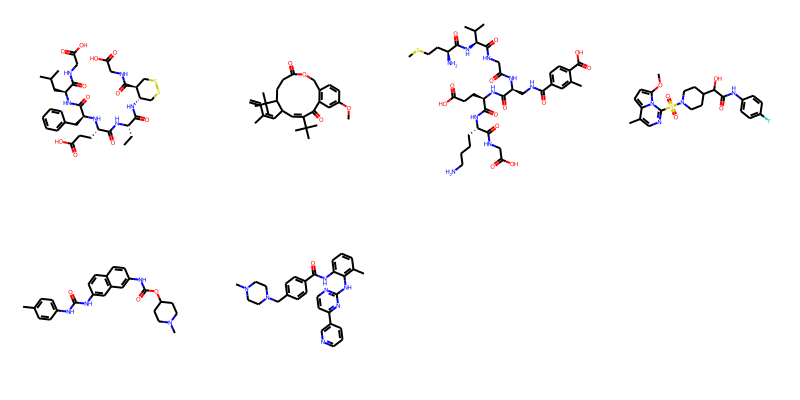

In [36]:
# Convert fragment SMILES to RDKit molecules
mols_to_draw = [Chem.MolFromSmiles(fragment) for fragment in known_library]

# Visualize the fragments
img = MolsToGridImage(mols_to_draw, molsPerRow=4, subImgSize=(200, 200))
img.show()

In [37]:

# Step 2: Fragmentation using BRICS
fragments = []
for molecule in known_library:
    mol = Chem.MolFromSmiles(molecule)
    frags = BRICSDecompose(mol,keepNonLeafNodes=False)
    fragments.extend(frags)

# Print the fragment
for fragment in fragments:
    print(fragment)



[1*]C(=O)[C@@H]([4*])CC
[1*]C(=O)[C@@H]([4*])C[8*]
[16*]c1ccccc1
[4*]CC(=O)O
[5*]N[5*]
[1*]C([6*])=O
[1*]C(=O)[C@@H]([4*])CCC(=O)O
[1*]C(=O)[C@@H]([4*])CC(C)C
[15*][C@H]1CSSC[C@@H]1[15*]
[8*]C(C)(C)C
[7*]C(C)C=C
[15*]C1C=C(C(C)(C)C)C(=O)c2cc([16*])ccc2COC(=O)CCC1[15*]
[3*]OC
[7*]C[8*]
[16*]c1ccc([16*])c(C)c1
[1*]C(=O)[C@@H]([4*])CCCCN
[1*]C(=O)[C@@H]([4*])C[4*]
[4*]CC(=O)O
[1*]C(=O)[C@@H](N)CC[4*]
[6*]C(=O)O
[1*]C(=O)[C@H]([4*])CCC(=O)O
[5*]N[5*]
[1*]C([6*])=O
[1*]C(=O)C[4*]
[11*]SC
[1*]C(=O)[C@@H]([4*])C(C)C
[1*]C(=O)C([8*])O
[5*]N1CCC([15*])CC1
[12*]S(=O)(=O)c1ncc(C)c2ccc([14*])n12
[16*]c1ccc(F)cc1
[5*]N[5*]
[3*]OC
[16*]c1ccc2ccc([16*])cc2c1
[16*]c1ccc(C)cc1
[15*]C1CCN(C)CC1
[5*]N[5*]
[3*]O[3*]
[1*]C([1*])=O
[16*]c1cccnc1
[4*]C[8*]
[5*]N1CCN(C)CC1
[16*]c1cccc(C)c1[16*]
[14*]c1ccnc([14*])n1
[5*]N[5*]
[1*]C([6*])=O
[16*]c1ccc([16*])cc1


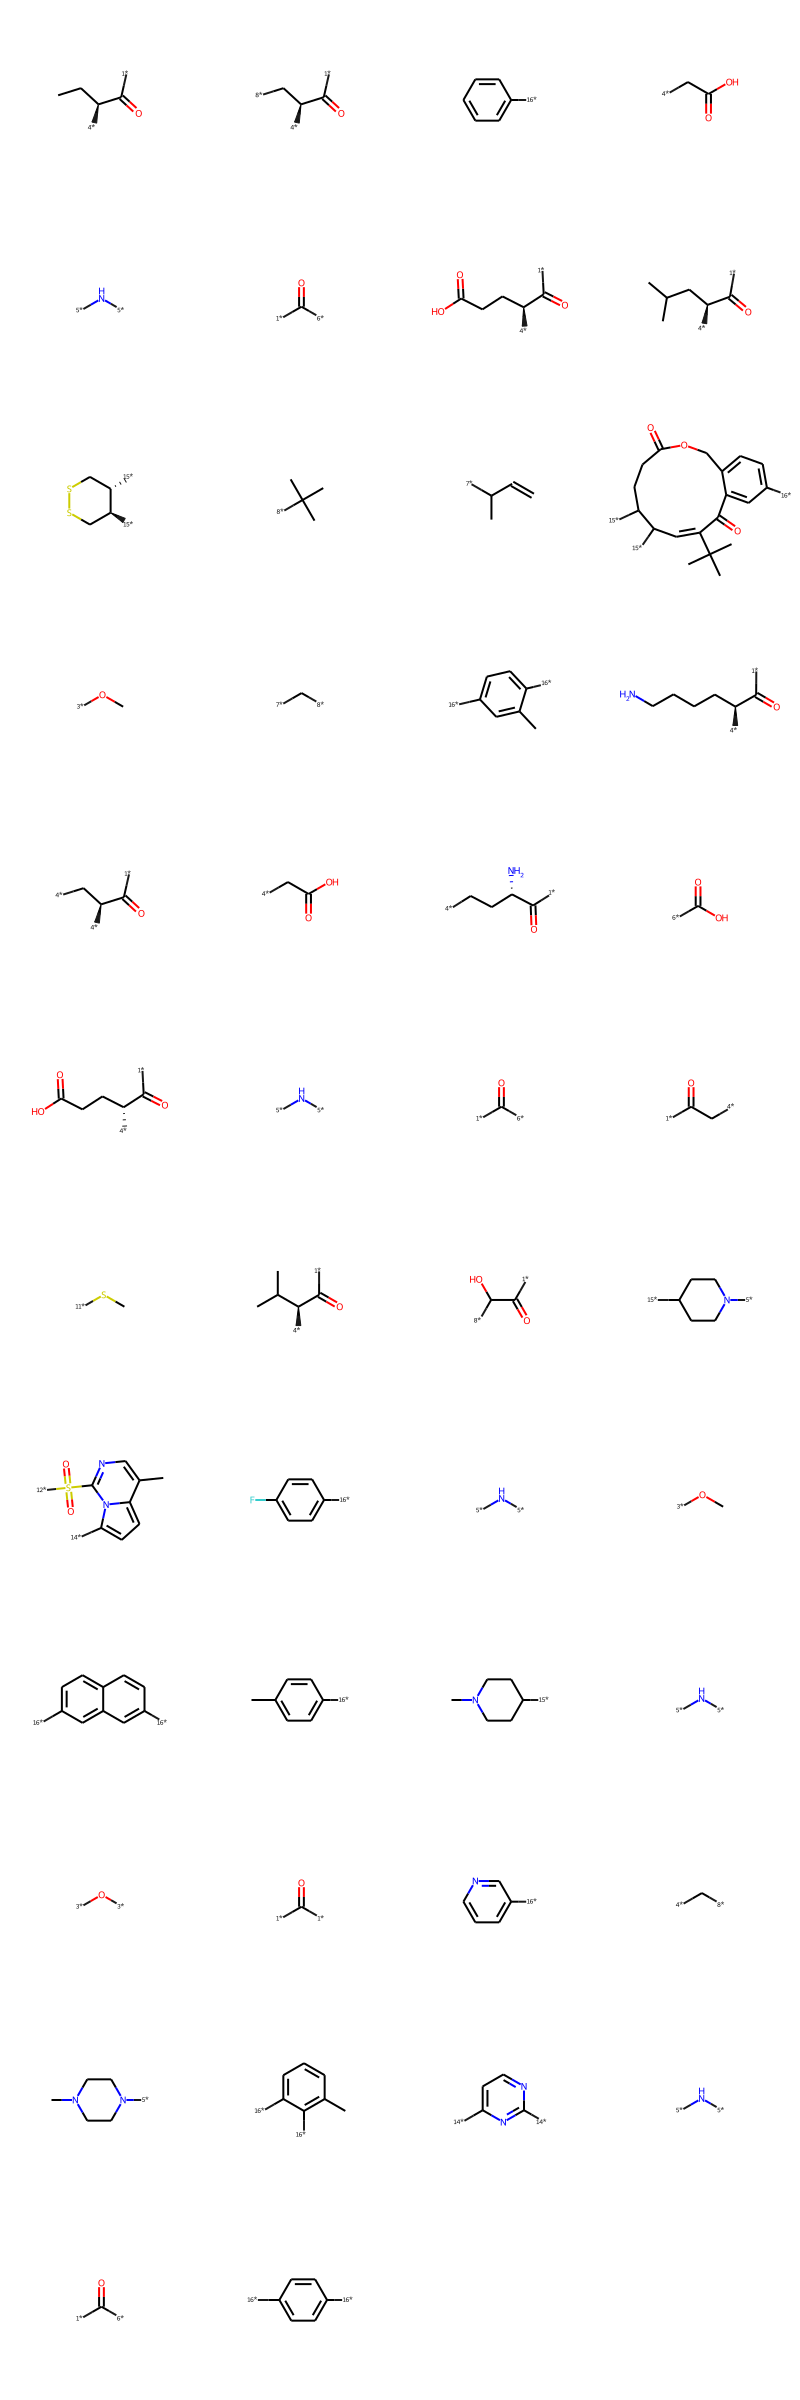

In [38]:
# Convert fragment SMILES to RDKit molecules
mols_to_draw = [Chem.MolFromSmiles(fragment) for fragment in fragments]

# Visualize the fragments
img = MolsToGridImage(mols_to_draw, molsPerRow=4, subImgSize=(200, 200))
img.show()

In [40]:
import re

strings = [
    "[1*]C(=O)[C@@H]([4*])CC",
    "[1*]C(=O)[C@@H]([4*])C[8*]",
    "[16*]c1ccccc1",
    "[4*]CC(=O)O",
    "[5*]N[5*]",
    "[1*]C([6*])=O",
    "[1*]C(=O)[C@@H]([4*])CCC(=O)O",
    "[1*]C(=O)[C@@H]([4*])CC(C)C",
    "[15*][C@H]1CSSC[C@@H]1[15*]",
    "[8*]C(C)(C)C",
    "[7*]C(C)C=C",
    "[15*]C1C=C(C(C)(C)C)C(=O)c2cc([16*])ccc2COC(=O)CCC1[15*]",
    "[3*]OC",
    "[7*]C[8*]",
    "[16*]c1ccc([16*])c(C)c1",
    "[1*]C(=O)[C@@H]([4*])CCCCN",
    "[1*]C(=O)[C@@H]([4*])C[4*]",
    "[4*]CC(=O)O",
    "[1*]C(=O)[C@@H](N)CC[4*]",
    "[6*]C(=O)O",
    "[1*]C(=O)[C@H]([4*])CCC(=O)O",
    "[5*]N[5*]",
    "[1*]C([6*])=O",
    "[1*]C(=O)C[4*]",
    "[11*]SC",
    "[1*]C(=O)[C@@H]([4*])C(C)C",
    "[1*]C(=O)C([8*])O",
    "[5*]N1CCC([15*])CC1",
    "[12*]S(=O)(=O)c1ncc(C)c2ccc([14*])n12",
    "[16*]c1ccc(F)cc1",
    "[5*]N[5*]",
    "[3*]OC",
    "[16*]c1ccc2ccc([16*])cc2c1",
    "[16*]c1ccc(C)cc1",
    "[15*]C1CCN(C)CC1",
    "[5*]N[5*]",
    "[3*]O[3*]",
    "[1*]C([1*])=O",
    "[16*]c1cccnc1",
    "[4*]C[8*]",
    "[5*]N1CCN(C)CC1",
    "[16*]c1cccc(C)c1[16*]",
    "[14*]c1ccnc([14*])n1",
    "[5*]N[5*]",
    "[1*]C([6*])=O",
    "[16*]c1ccc([16*])cc1"
]

# Replace numbers within brackets with "*"
new_strings = []
for string in strings:
    new_string = re.sub(r"\[\d+\*\]", "[*]", string)
    new_strings.append(new_string)

# Output the new strings
for new_string in new_strings:
    print(new_string)

[*]C(=O)[C@@H]([*])CC
[*]C(=O)[C@@H]([*])C[*]
[*]c1ccccc1
[*]CC(=O)O
[*]N[*]
[*]C([*])=O
[*]C(=O)[C@@H]([*])CCC(=O)O
[*]C(=O)[C@@H]([*])CC(C)C
[*][C@H]1CSSC[C@@H]1[*]
[*]C(C)(C)C
[*]C(C)C=C
[*]C1C=C(C(C)(C)C)C(=O)c2cc([*])ccc2COC(=O)CCC1[*]
[*]OC
[*]C[*]
[*]c1ccc([*])c(C)c1
[*]C(=O)[C@@H]([*])CCCCN
[*]C(=O)[C@@H]([*])C[*]
[*]CC(=O)O
[*]C(=O)[C@@H](N)CC[*]
[*]C(=O)O
[*]C(=O)[C@H]([*])CCC(=O)O
[*]N[*]
[*]C([*])=O
[*]C(=O)C[*]
[*]SC
[*]C(=O)[C@@H]([*])C(C)C
[*]C(=O)C([*])O
[*]N1CCC([*])CC1
[*]S(=O)(=O)c1ncc(C)c2ccc([*])n12
[*]c1ccc(F)cc1
[*]N[*]
[*]OC
[*]c1ccc2ccc([*])cc2c1
[*]c1ccc(C)cc1
[*]C1CCN(C)CC1
[*]N[*]
[*]O[*]
[*]C([*])=O
[*]c1cccnc1
[*]C[*]
[*]N1CCN(C)CC1
[*]c1cccc(C)c1[*]
[*]c1ccnc([*])n1
[*]N[*]
[*]C([*])=O
[*]c1ccc([*])cc1


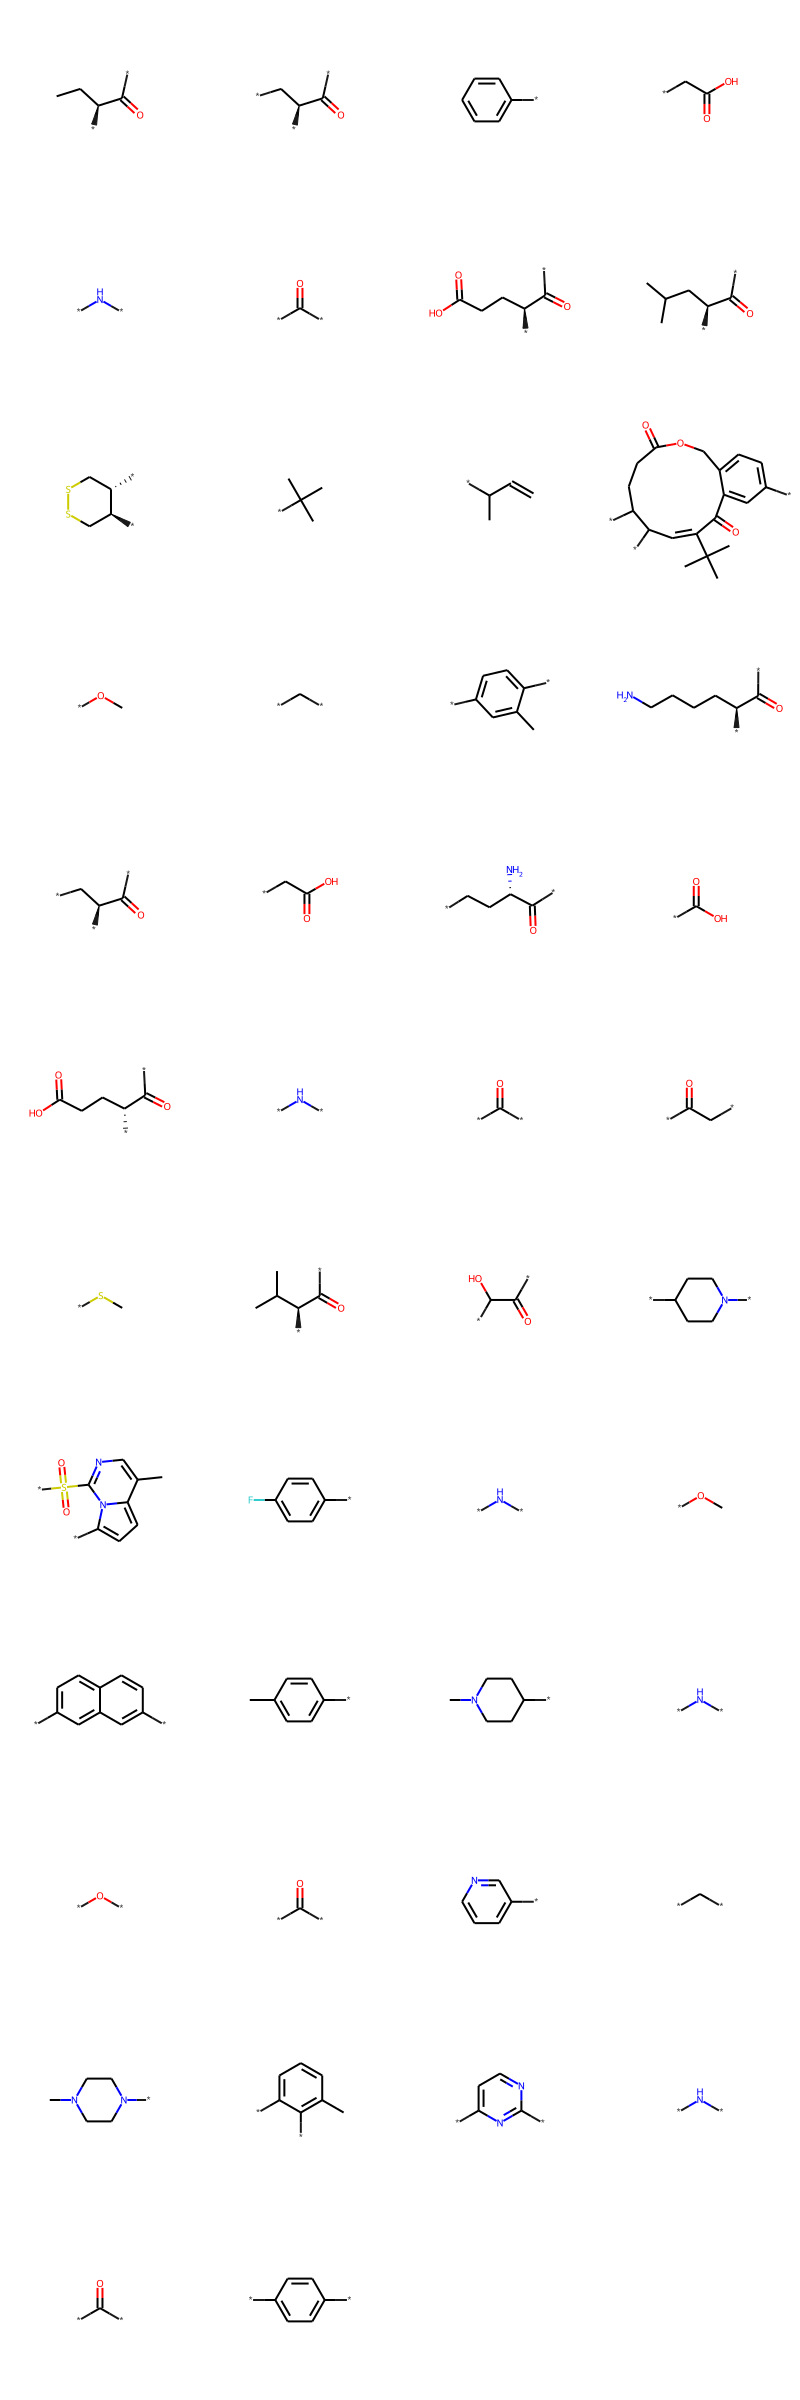

In [41]:
# Convert fragment SMILES to RDKit molecules
mols_to_draw = [Chem.MolFromSmiles(new_string) for new_string in new_strings]

# Visualize the fragments
img = MolsToGridImage(mols_to_draw, molsPerRow=4, subImgSize=(200, 200))
img.show()